In [3]:
#install pandas
#install numpy
#install matplotlib
#install seaborn
#install scikit-learn
#install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import seaborn as sns
from scipy import stats

In [4]:
gss_2022 = pd.read_stata("GSS2022.dta", convert_categoricals=False)
gss_2022.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,occ10,prestg10,prestg105plus,...,famgen_exp,hhtype1_exp,batch,subsamprate,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next,wtssps_as,wtssnrps_as
0,2022,1,1.0,40.0,NaN,NaN,2.0,430.0,39.0,42.0,...,NaN,NaN,NaN,1.0,NaN,NaN,0.230979,0.267499,0.276424,0.376261
1,2022,2,5.0,NaN,NaN,1.0,2.0,50.0,53.0,73.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.673530,0.894114
2,2022,3,1.0,52.0,NaN,NaN,2.0,4610.0,48.0,44.0,...,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,1.210757,1.681792
3,2022,4,3.0,NaN,25.0,NaN,2.0,4120.0,34.0,29.0,...,NaN,NaN,2.0,NaN,NaN,NaN,0.880743,1.089382,1.083156,1.485871
4,2022,5,8.0,NaN,NaN,1.0,2.0,7330.0,38.0,37.0,...,2.0,5.0,1.0,NaN,1.704444,3.219778,1.693235,2.121712,1.277208,1.754268


In [5]:
gss_2022['partyid']
gss_2022['pres16']
gss_2022['polviews']


0       2.0
1       5.0
2       4.0
3       1.0
4       5.0
       ... 
4144    4.0
4145    2.0
4146    2.0
4147    1.0
4148    4.0
Name: polviews, Length: 4149, dtype: float64

In [6]:
# Percentage of missing values per column
missing_percent = gss_2022[['partyid', 'pres16', 'polviews']].isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


pres16      40.925524
polviews     3.060979
partyid      0.867679
dtype: float64


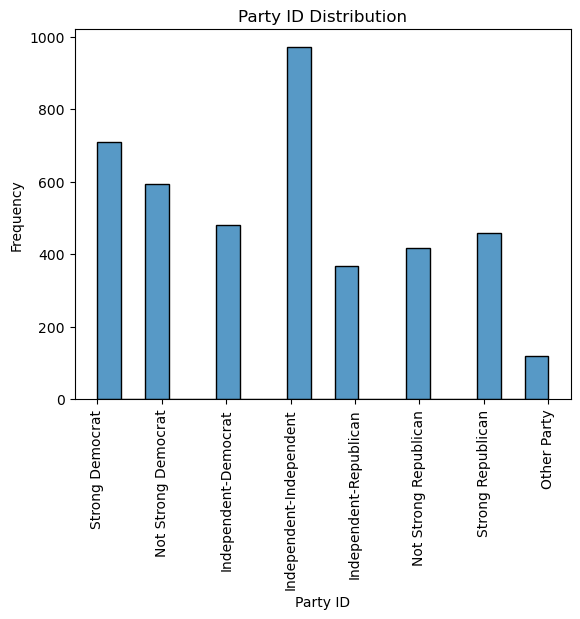

In [7]:
#of our three primary politival variables, pres16 has the most missing values, at ~41%.  We will compare across the dataset using the others.
#now we will generate distributions for each of the variables
sns.histplot(gss_2022['partyid'])
#add a title and box labels
plt.title('Party ID Distribution')
plt.xlabel('Party ID')
plt.ylabel('Frequency')
#label boxes according to: 
#0 = Strong Democrat
#1 = Not Strong Democrat
#2 = Independent-Democrat
#3 = Independent-Independent
#4 = Independent-Republican
#5 = Not Strong Republican
#6 = Strong Republican
#7 = Other Party
labels = {0: 'Strong Democrat', 1: 'Not Strong Democrat', 2: 'Independent-Democrat', 3: 'Independent-Independent', 4: 'Independent-Republican', 5: 'Not Strong Republican', 6: 'Strong Republican', 7: 'Other Party'}
plt.xticks(list(labels.keys()), list(labels.values()), rotation=90)
plt.show()


we see a lot of different political beleifs displayed, leaning slightly democrat overall, but we can make some insights with these groups

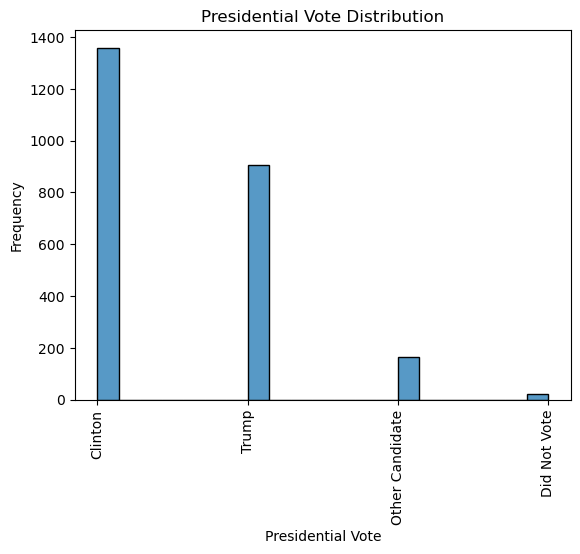

In [26]:
#create a histogram for the pres16 variable
sns.histplot(gss_2022['pres16'])
#add a title and box labels
plt.title('Presidential Vote Distribution')
plt.xlabel('Presidential Vote')
plt.ylabel('Frequency')
#label boxes according to: 
#1 = Clinton
#2 = Trump
#3 = Other Candidate
#4 = Did Not Vote
labels = {1: 'Clinton', 2: 'Trump', 3: 'Other Candidate', 4: 'Did Not Vote'}
plt.xticks(list(labels.keys()), list(labels.values()), rotation=90)
plt.show()


Among the people who filled out pres16, we have a clear clinton lean

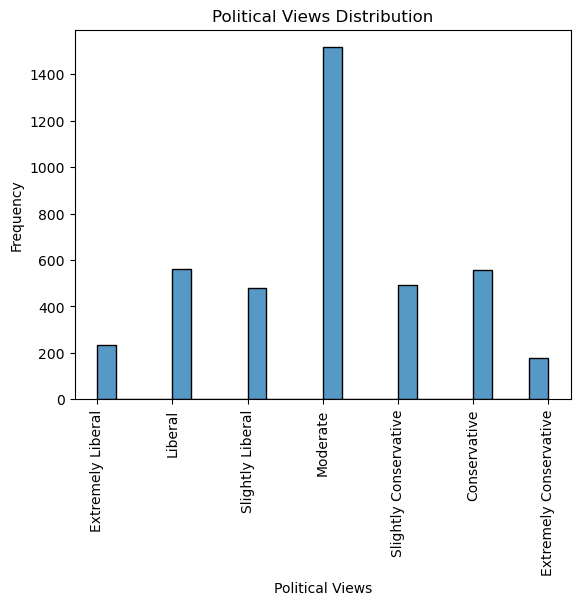

In [27]:
#generate the same figure of the polviews variable
sns.histplot(gss_2022['polviews'])
#add a title and box labels
plt.title('Political Views Distribution')
plt.xlabel('Political Views')
plt.ylabel('Frequency')
#label boxes according to:
# 1 = extremely liberal 
# 2 = liberal
# 3 = slightly liberal 
# 4 = moderate
# 5 = slightly conservative
# 6 = conservative
# 7 = extremely conservative

labels = {1: 'Extremely Liberal', 2: 'Liberal', 3: 'Slightly Liberal', 4: 'Moderate', 5: 'Slightly Conservative', 6: 'Conservative', 7: 'Extremely Conservative'}
plt.xticks(list(labels.keys()), list(labels.values()), rotation=90)
plt.show()

# we see a lot of moderates


We have a lot of moderates, and a fairly balanced distribution of other categories

In [8]:
gss_2022 = gss_2022.drop_duplicates()

In [9]:
print(len(gss_2022))

4149


In [10]:
#rename columns for readability
gss_2022 = gss_2022.rename(columns={'partyid': 'party_id', 'pres16': 'presidential_vote_2016', 'polviews': 'political_views'})

In [11]:
#add another category for missing values in critical variables (political views)
gss_2022[['political_views', 'party_id', 'presidential_vote_2016']] = gss_2022[['political_views', 'party_id', 'presidential_vote_2016']].fillna(8)


In [12]:
#now we are interested in imputating missing values of non-critical variables using KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5) #5 is a reasonable size for this dataset
gss_2022_imputed = gss_2022.copy()
#now impute secondary, important varaibles over the dataset
gss_2022_imputed[['age', 'educ', 'income']] = imputer.fit_transform(gss_2022[['age', 'educ', 'income']])

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,occ10,prestg10,prestg105plus,...,famgen_exp,hhtype1_exp,batch,subsamprate,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next,wtssps_as,wtssnrps_as
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrkstat,NaN,NaN,1.000000,0.052512,0.007695,0.034574,0.198821,0.080544,0.041765,0.041765,...,-0.005304,0.004473,-0.006769,0.018812,-0.002206,-0.002206,0.007693,0.007693,NaN,NaN
hrs1,NaN,NaN,0.052512,1.000000,-0.185865,-0.835155,0.218856,0.030241,0.028241,0.028241,...,0.009782,0.011277,-0.023877,-0.014833,-0.058372,-0.058372,-0.044143,-0.044143,NaN,NaN
hrs2,NaN,NaN,0.007695,-0.185865,1.000000,-0.122374,0.034216,-0.015407,-0.015727,-0.015727,...,0.003438,0.005507,-0.015404,-0.029489,0.017338,0.017338,-0.009000,-0.009000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wtssnrps_nea,NaN,NaN,-0.002206,-0.058372,0.017338,0.067503,0.008269,0.185755,0.186596,0.186596,...,-0.020825,-0.018092,0.295872,-0.243370,1.000000,1.000000,0.539848,0.539848,NaN,NaN
wtssps_next,NaN,NaN,0.007693,-0.044143,-0.009000,0.059320,0.020950,0.246687,0.247167,0.247167,...,-0.017778,-0.013837,0.214652,-0.086884,0.539848,0.539848,1.000000,1.000000,NaN,NaN
wtssnrps_next,NaN,NaN,0.007693,-0.044143,-0.009000,0.059320,0.020950,0.246687,0.247167,0.247167,...,-0.017778,-0.013837,0.214652,-0.086884,0.539848,0.539848,1.000000,1.000000,NaN,NaN
wtssps_as,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


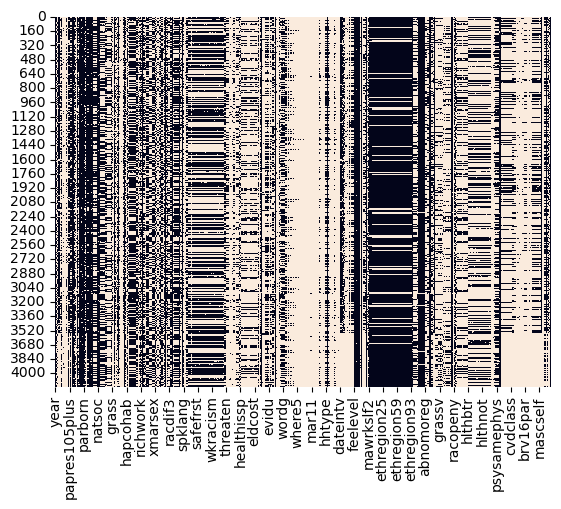

In [34]:
#let's check if missingness is random or not: 

#we'll reimport first 
gss_2022_reinvestigate = pd.read_stata("GSS2022.dta", convert_categoricals=False)
#we'll drop duplicates
gss_2022_reinvestigate = gss_2022_reinvestigate.drop_duplicates()
#now we can just check if the missingness is random
sns.heatmap(gss_2022_reinvestigate.isnull(), cbar=False)
gss_2022_reinvestigate.isnull().corr()

In [36]:
print(gss_2022_reinvestigate.isnull().corr())

               year  id   wrkstat      hrs1      hrs2    evwork    wrkslf  \
year            NaN NaN       NaN       NaN       NaN       NaN       NaN   
id              NaN NaN       NaN       NaN       NaN       NaN       NaN   
wrkstat         NaN NaN  1.000000  0.052512  0.007695  0.034574  0.198821   
hrs1            NaN NaN  0.052512  1.000000 -0.185865 -0.835155  0.218856   
hrs2            NaN NaN  0.007695 -0.185865  1.000000 -0.122374  0.034216   
...             ...  ..       ...       ...       ...       ...       ...   
wtssnrps_nea    NaN NaN -0.002206 -0.058372  0.017338  0.067503  0.008269   
wtssps_next     NaN NaN  0.007693 -0.044143 -0.009000  0.059320  0.020950   
wtssnrps_next   NaN NaN  0.007693 -0.044143 -0.009000  0.059320  0.020950   
wtssps_as       NaN NaN       NaN       NaN       NaN       NaN       NaN   
wtssnrps_as     NaN NaN       NaN       NaN       NaN       NaN       NaN   

                  occ10  prestg10  prestg105plus  ...  famgen_exp  \
year  

For now, we will ignore this, but this will become important later

In [28]:
def reclassify_educ(x):
    if x <= 8:
        return 'No High School'
    elif x <= 12:
        return 'High School'
    elif x < 16:
        return '<4 years college'
    else:
        return '4+ years college'

In [29]:
gss_2022_imputed['education_reclassified'] = gss_2022_imputed['educ'].apply(reclassify_educ)

# Display results
print(gss_2022_imputed[['educ', 'education_reclassified']].head(10))
#now turn the reclassified into a numeric
gss_2022_imputed['education_reclassified_num'] = gss_2022_imputed['education_reclassified'].astype('category').cat.codes
#display results
print(gss_2022_imputed[['educ', 'education_reclassified', 'education_reclassified_num']].head(10))
#show all cat codes: 
print(gss_2022_imputed['education_reclassified'].astype('category').cat.codes.unique())
#set the codes so 0-4 goes from least to most education
gss_2022_imputed['education_reclassified_num'] = gss_2022_imputed['education_reclassified_num'].replace({0: 3, 1: 2, 2: 1, 3: 0})
#display results
print(gss_2022_imputed[['educ', 'education_reclassified', 'education_reclassified_num']].head(30))

   educ education_reclassified
0  16.0       4+ years college
1  18.0       4+ years college
2  12.0            High School
3  16.0       4+ years college
4  14.0       <4 years college
5  12.0            High School
6  12.0            High School
7  16.0       4+ years college
8  12.0            High School
9  12.0            High School
   educ education_reclassified  education_reclassified_num
0  16.0       4+ years college                           0
1  18.0       4+ years college                           0
2  12.0            High School                           2
3  16.0       4+ years college                           0
4  14.0       <4 years college                           1
5  12.0            High School                           2
6  12.0            High School                           2
7  16.0       4+ years college                           0
8  12.0            High School                           2
9  12.0            High School                           2
[0 2 1 3]


([<matplotlib.axis.XTick at 0x16e4d67d0>,
 [Text(0, 0, 'No High School'),
  Text(1, 0, 'High School'),
  Text(2, 0, '<4 years college'),
  Text(3, 0, '4+ years college')])

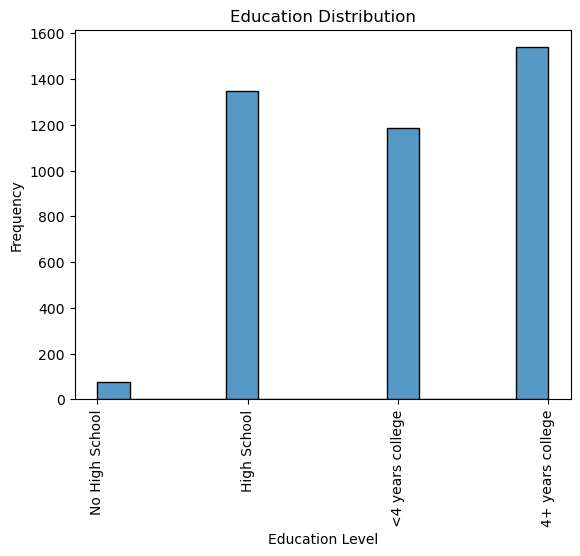

In [27]:
#generate a distribution for these values
sns.histplot(gss_2022_imputed['education_reclassified_num'])
#add appropriate labels to boxes
plt.title('Education Distribution') 
plt.xlabel('Education Level')
plt.ylabel('Frequency')
labels = {0: 'No High School', 1: 'High School', 2: '<4 years college', 3: '4+ years college'}
plt.xticks(list(labels.keys()), list(labels.values()), rotation=90)

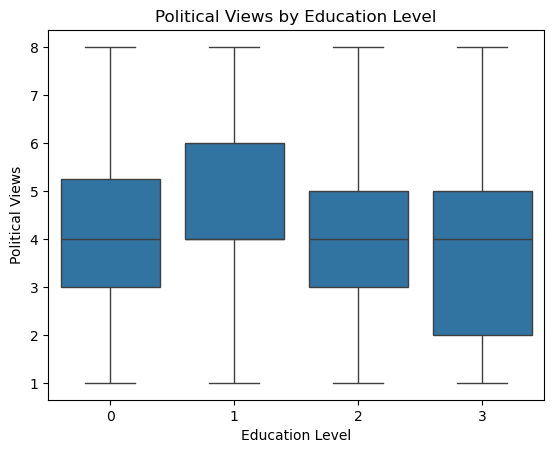

In [36]:
#we can use the new metrics to make a boxplot of education levels and political views
sns.boxplot(x='education_reclassified_num', y='political_views', data=gss_2022_imputed)
plt.title('Political Views by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Political Views')
plt.show()


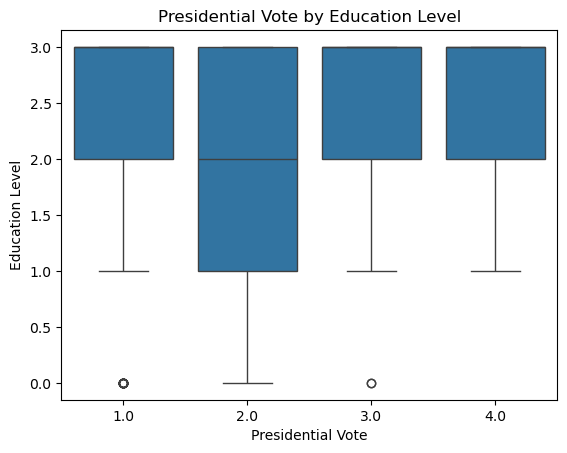

In [41]:
#lets do the same for voting -- removing 8s
gss_2022_imputed = gss_2022_imputed[gss_2022_imputed['presidential_vote_2016'] != 8]
#generate a boxplot of education levels and voting
sns.boxplot(x='presidential_vote_2016', y='education_reclassified_num', data=gss_2022_imputed)
plt.title('Presidential Vote by Education Level')
plt.ylabel('Education Level')
plt.xlabel('Presidential Vote')
plt.show()

In [39]:
#generate correlation matrix for these variables: 
corr = gss_2022_imputed[['age', 'educ', 'income', 'political_views']].corr()
corr

,age,educ,income,political_views
age,1.000000,0.030823,0.026057,0.106726
educ,0.030823,1.000000,0.240798,-0.154643
income,0.026057,0.240798,1.000000,-0.021072
political_views,0.106726,-0.154643,-0.021072,1.000000


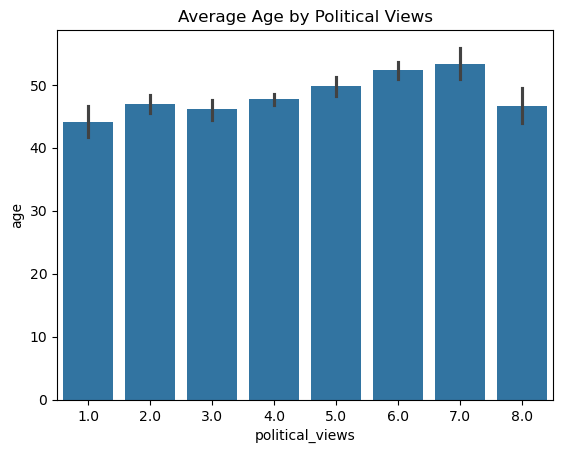

<Axes: xlabel='political_views', ylabel='educ'>

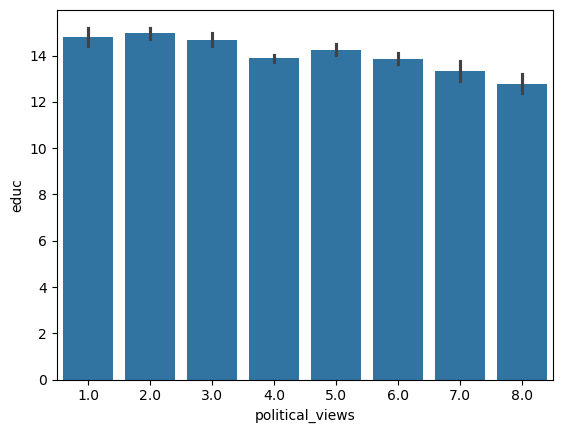

In [43]:
# plot average value in each class
sns.barplot(x='political_views', y='age', data=gss_2022_imputed)
plt.title('Average Age by Political Views')
plt.show()

sns.barplot(x='political_views', y='educ', data=gss_2022_imputed)
#add more intuitive labels to the x-axis labels
labels = {
plt.title('Average Education by Political Views')
plt.xlabel('Political Views')

plt.show()


In [42]:
# I want to use ml to mine for interesting relationships
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#split the data into training and testing sets
X = gss_2022_imputed[['age', 'educ', 'income', 'political_views', 'education_reclassified_num']]
y = gss_2022_imputed['presidential_vote_2016']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

#predict on the test set
y_pred = clf.predict(X_test)


In [43]:
#now analyze performance:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.71      0.77      0.74       273
         2.0       0.64      0.58      0.61       187
         3.0       0.08      0.07      0.07        29
         4.0       0.00      0.00      0.00         2

    accuracy                           0.65       491
   macro avg       0.36      0.35      0.35       491
weighted avg       0.64      0.65      0.65       491

0.6517311608961304
[[210  50  12   1]
 [ 68 108  11   0]
 [ 17  10   2   0]
 [  1   1   0   0]]


In [47]:
#now give the forest access to all numeric columns in gss_2022_imputed
X = gss_2022_imputed.select_dtypes(include=[np.number]).drop(columns='presidential_vote_2016').fillna(0)
y = gss_2022_imputed['presidential_vote_2016']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

#predict on the test set
y_pred = clf.predict(X_test)

#now analyze performance:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

         1.0       0.86      0.97      0.91       273
         2.0       0.87      0.86      0.86       187
         3.0       0.00      0.00      0.00        29
         4.0       0.00      0.00      0.00         2

    accuracy                           0.86       491
   macro avg       0.43      0.46      0.44       491
weighted avg       0.81      0.86      0.83       491

0.8635437881873728
[[264   9   0   0]
 [ 27 160   0   0]
 [ 16  13   0   0]
 [  1   1   0   0]]


/Users/gordondoore/opt/anaconda3/envs/x43/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gordondoore/opt/anaconda3/envs/x43/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gordondoore/opt/anaconda3/envs/x43/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [56]:
#function for filling in missing values in a dataframe:
def dataframe_impute(df):
    #we use a knn imputer to fill in missing values in numeric columns
    imputer = KNNImputer(n_neighbors=5)
    df_imputed = df.copy()
    #we impute all numeric columns
    df_imputed[df_imputed.select_dtypes(include=[np.number]).columns] = imputer.fit_transform(df_imputed.select_dtypes(include=[np.number]))

    #in non-numeric columns, we fill in missing values with the most common value
    df_imputed[df_imputed.select_dtypes(exclude=[np.number]).columns] = df_imputed.select_dtypes(exclude=[np.number]).apply(lambda x: x.fillna(x.value_counts().index[0]))
    return df_imputed

/Users/gordondoore/opt/anaconda3/envs/x43/lib/python3.11/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/gordondoore/opt/anaconda3/envs/x43/lib/python3.11/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/gordondoore/opt/anaconda3/envs/x43/lib/python3.11/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Original shape: (2451, 1190)
New shape: (2451, 253)
Index(['year', 'id', 'wrkstat', 'wrkslf', 'occ10', 'prestg10', 'prestg105plus',
       'indus10', 'marital', 'pawrkslf',
       ...
       'totalincentive', 'respnumh', 'hefinfo1', 'wtssps_as', 'wtssnrps_as',
       'education_reclassified_num', 'political_views_encoded',
       'education_reclassified_<4 years college',
       'education_reclassified_High School',
       'education_reclassified_No High School'],
      dtype='object', length=253)
lenth of columns:  253
Index(['year', 'id', 'wrkstat', 'wrkslf', 'occ10', 'prestg10', 'prestg105plus',
       'indus10', 'marital', 'pawrkslf',
       ...
       'totalincentive', 'respnumh', 'hefinfo1', 'wtssps_as', 'wtssnrps_as',
       'education_reclassified_num', 'political_views_encoded',
       'education_reclassified_<4 years college',
       'education_reclassified_High School',
       'education_reclassified_No High School'],
      dtype='object', length=253)
lenth of columns:  253


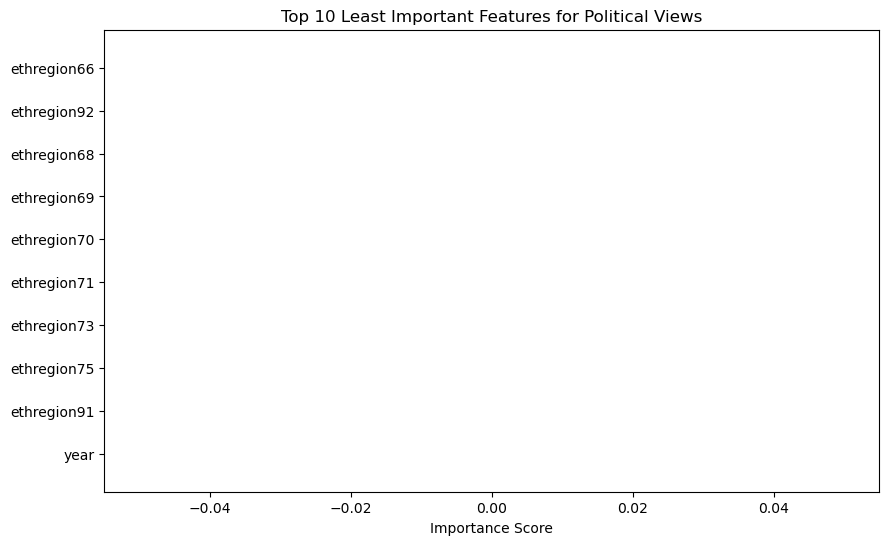

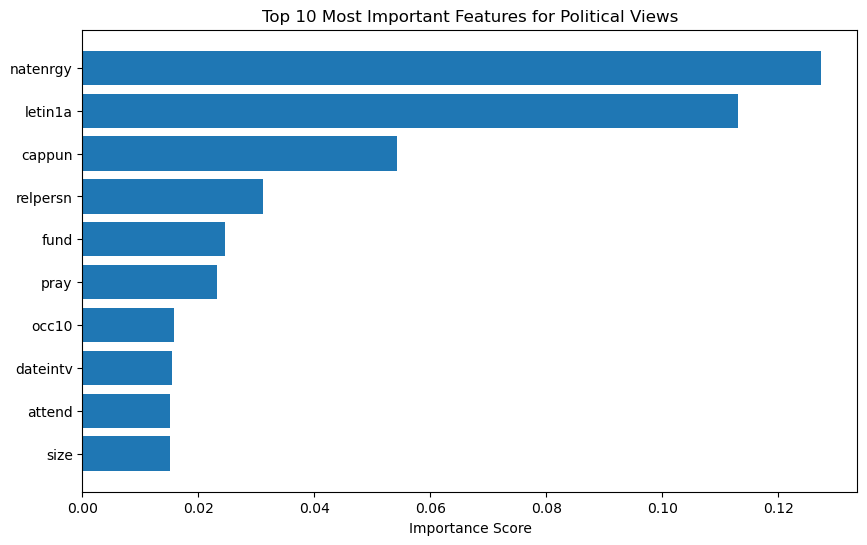

In [80]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
#import scipy mode
from scipy import stats
# Encode target variable (political views)
le = LabelEncoder()
gss_2022_imputed['political_views_encoded'] = le.fit_transform(gss_2022_imputed['political_views'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(gss_2022_imputed, drop_first=True)

# Scale numerical features
df_encoded_scaled = scaler.fit_transform(df_encoded)

# Convert back to DataFrame
df_encoded = pd.DataFrame(df_encoded_scaled, columns=df_encoded.columns)

#remove columns that are not needed

# Set the threshold for missing values
threshold = 0.8 * len(df_encoded)

# Drop columns with more than 80% missing values
df_cleaned = df_encoded.dropna(axis=1, thresh=threshold)

# Print shape before and after
print(f"Original shape: {df_encoded.shape}")
print(f"New shape: {df_cleaned.shape}")

print(df_cleaned.columns)
print("lenth of columns: ", len(df_cleaned.columns))

df_imputed = dataframe_impute(df_cleaned)

# Train Random Forest
print(df_imputed.columns)
#print of the columns are found 
print("lenth of columns: ", len(df_imputed.columns))
print(df_imputed['political_views_encoded'].head)
X = df_imputed.drop(columns=['political_views_encoded', 'political_views', 'presidential_vote_2016', 'party_id', 'pres20', 'vote16']).to_numpy()
y = df_imputed['political_views_encoded'].to_numpy()

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

#print test set preformance
y_pred = rf.predict(X)
print("pearson r: ",stats.pearsonr(y_pred, y))
#get mse as well
print("mse is : ",np.mean((y_pred - y) ** 2))

# Get feature importances
importances = rf.feature_importances_
feature_names = df_imputed.drop(columns=['political_views_encoded', 'political_views', 'presidential_vote_2016', 'party_id', 'pres20', 'vote16']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Visualize least important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel("Importance Score")
plt.title("Top 10 Least Important Features for Political Views")
plt.show()

#plot the most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][-10:], importance_df['Importance'][-10:])
plt.xlabel("Importance Score")
plt.title("Top 10 Most Important Features for Political Views")
plt.show()



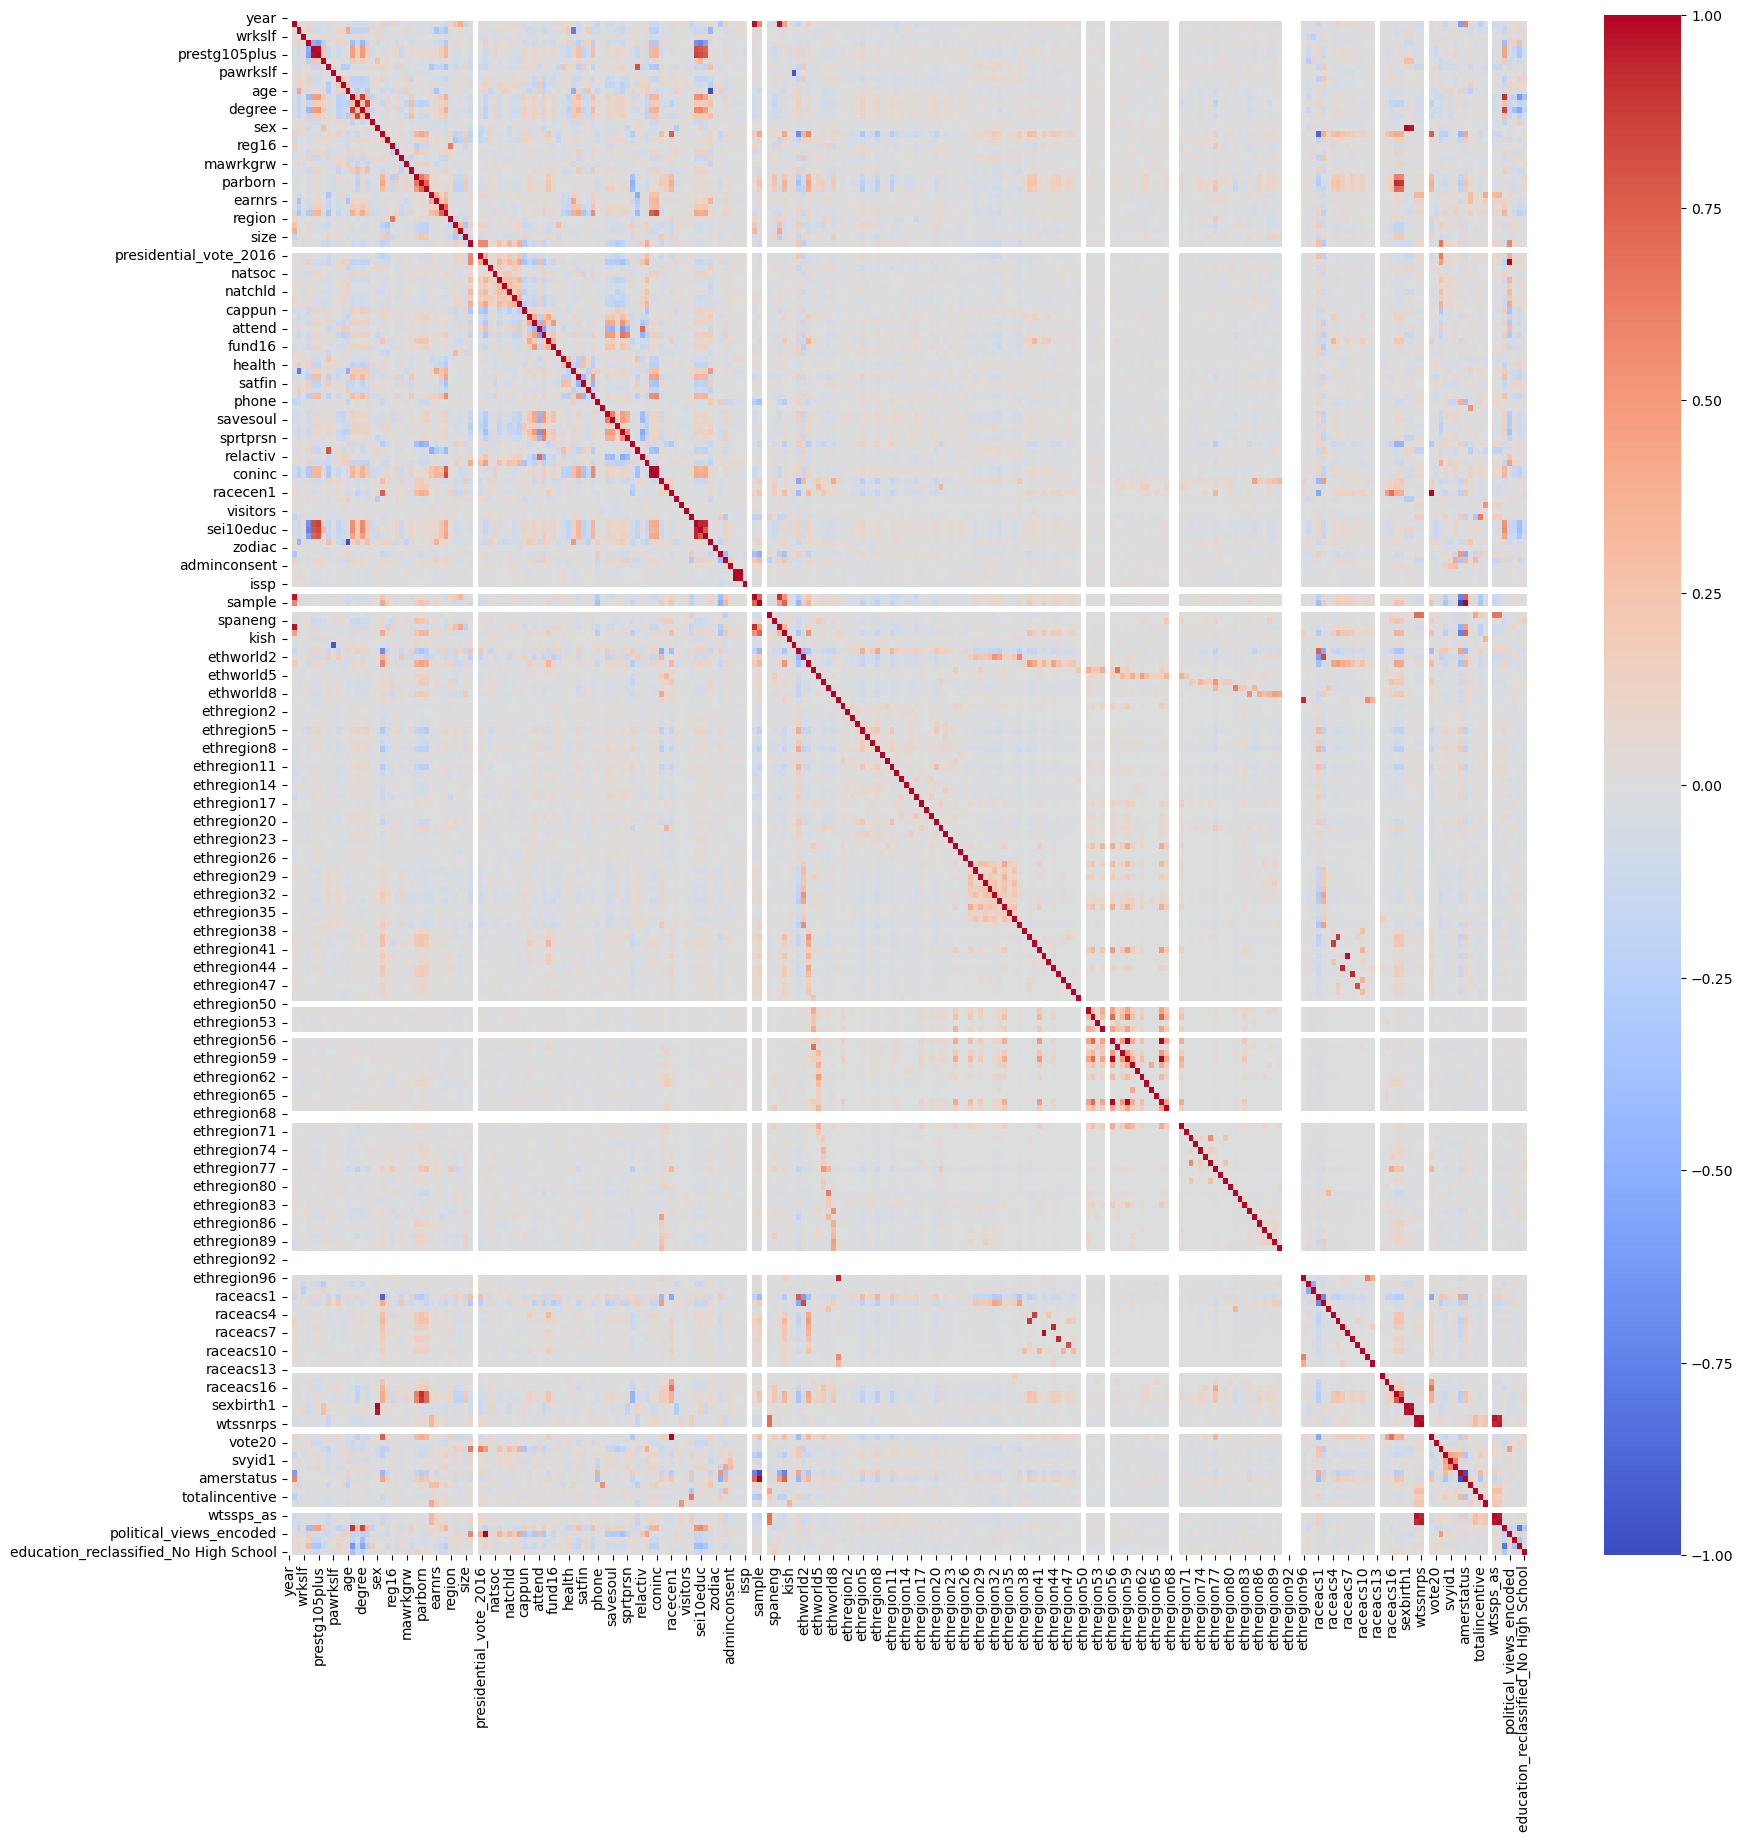

In [75]:
#generagte a heatmap of the correlation matrix
corr = df_imputed.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()


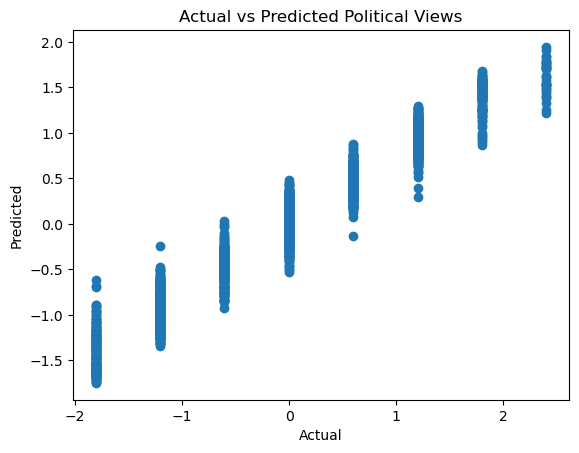

In [76]:
#show test set predictions and actual values
plt.scatter(y, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Political Views')
plt.show()

In [77]:
#print average error
print("average error: ",np.mean(y_pred - y))


average error:  0.0003975492322982723


In [ ]:
#now we will use xgboost to predict political views and hopefully capture interactiosn 
from xgboost import XGBRegressor

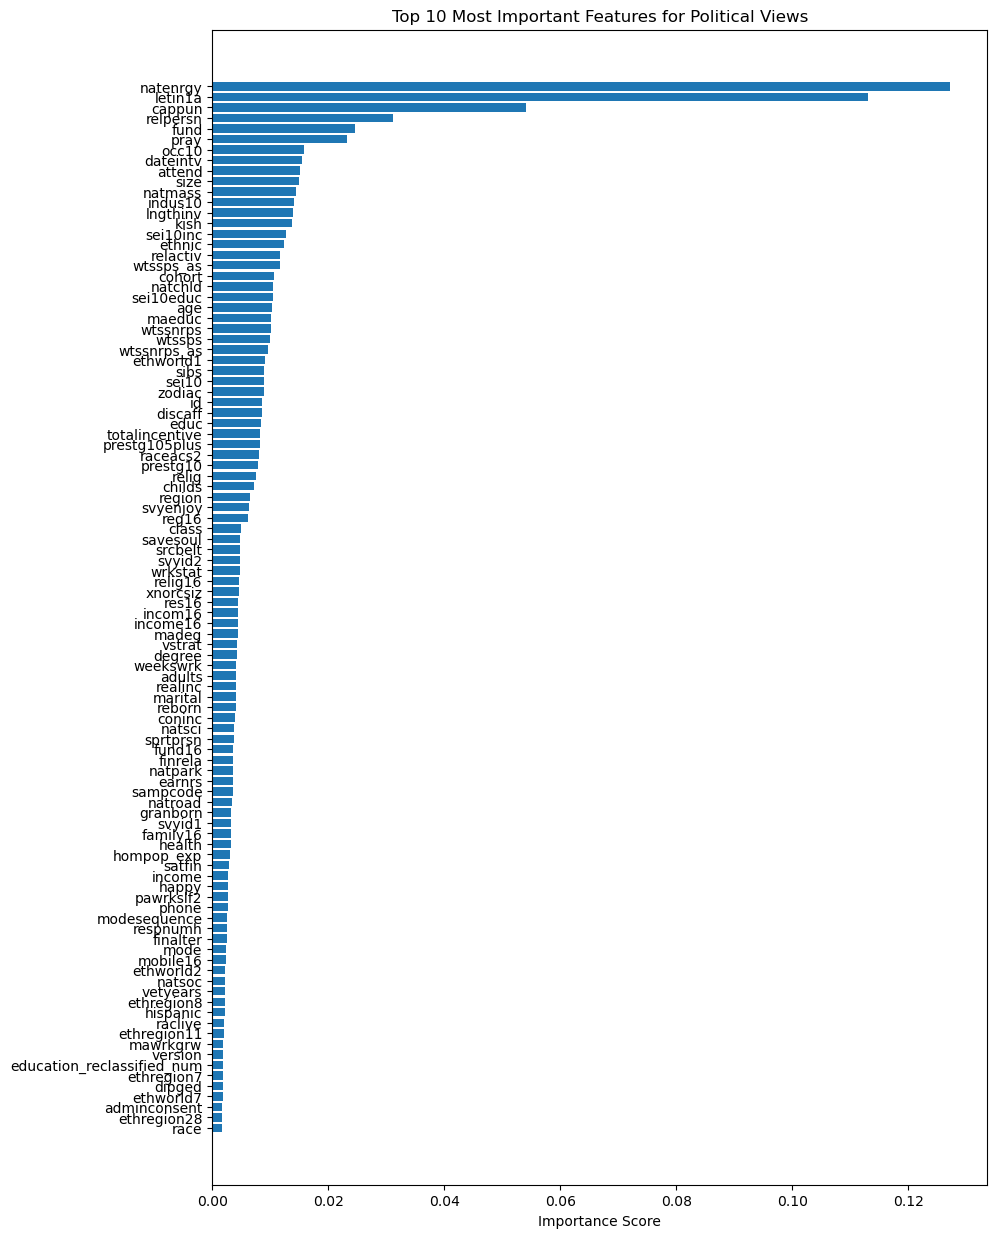

In [72]:

#plot the most important features
plt.figure(figsize=(10, 15))
plt.barh(importance_df['Feature'][-100:], importance_df['Importance'][-100:])
plt.xlabel("Importance Score")
plt.title("Top 10 Most Important Features for Political Views")
#make the labels more readable
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#increase figure size


plt.show()


pearson r:  PearsonRResult(statistic=0.9589089726162172, pvalue=0.0)
mse is :  0.15408192093356465


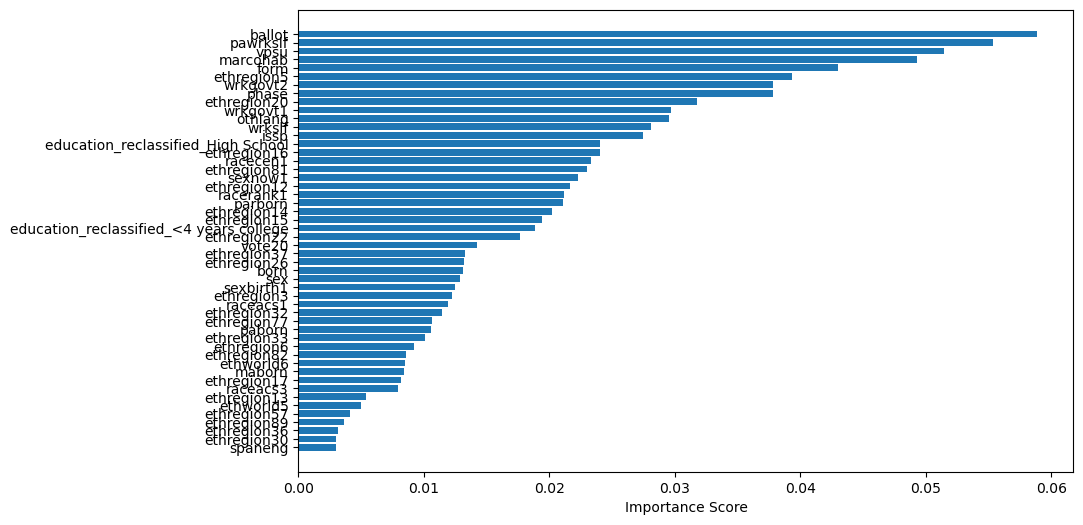

In [81]:
#retrain a new forest using only the 50th-100th most important features
X = df_imputed[importance_df['Feature'][-150:-100]].to_numpy()
y = df_imputed['political_views_encoded'].to_numpy()

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Print test set performance
y_pred = rf.predict(X)
print("pearson r: ",stats.pearsonr(y_pred, y))
print("mse is : ",np.mean((y_pred - y) ** 2))

# Get feature importances
importances = rf.feature_importances_
feature_names = df_imputed[importance_df['Feature'][-150:-100]].columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance Score")
plt.show()

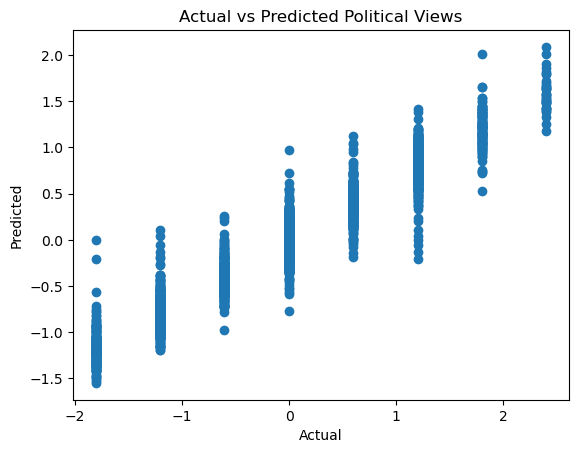

In [82]:
#plot these features relative to the labels
plt.scatter(y, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Political Views')
plt.show()


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

# Assuming df_encoded is already defined and preprocessed

# Step 2: Train a model
# Drop columns that are not features
X = df_encoded.drop(columns=['political_views_encoded', 'political_views', 'presidential_vote_2016', 'party_id'])
y = df_encoded['political_views_encoded']

# Train HistGradientBoostingRegressor
rf = HistGradientBoostingRegressor(random_state=42)
rf.fit(X, y)

# Step 3: Feature importance using permutation importance
result = permutation_importance(rf, X, y, n_repeats=10, random_state=42, n_jobs=1)
importances = result.importances_mean
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Step 4: Identify least important features
least_important_features = importance_df.sort_values(by='Importance', ascending=True).head(10)

# Visualize least important features
plt.figure(figsize=(10, 6))
plt.barh(least_important_features['Feature'], least_important_features['Importance'])
plt.xlabel("Importance Score")
plt.title("Top 10 Least Important Features for Predicting Political Views")
plt.show()

# Step 5: Analyze common ground
# Print the least important features
print("Least Important Features:")
print(least_important_features)

# Further analysis can be done based on the least important features
# For example, you can analyze the distribution of these features across different political ideologies

KeyboardInterrupt: 